# Wine Quality Data Analysis

content of the current directory:

In [1]:
% ls

Readme.md                    winequality-white.csv
Wine Quality Analysis.ipynb  winequality.names.txt
winequality-red.csv


In [2]:
# import libs
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set(style="whitegrid", palette="muted")
import numpy as np
import matplotlib.pyplot as plt

### Create DataFrames for white and red wines

In [3]:
white_wine_df = pd.read_csv('winequality-white.csv', sep=";")
red_wine_df = pd.read_csv('winequality-red.csv', sep=";")

### DataFrames for red and white wines combined

In [4]:
ww = white_wine_df.loc[:]
ww["color"] = "white"
rw = red_wine_df.loc[:]
rw["color"] = "red"
wine_df = pd.concat([ww, rw], ignore_index=True)

# Data

In [5]:
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [6]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
assert white_wine_df.columns.all() == red_wine_df.columns.all()
",".join(list(white_wine_df.columns))

'fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color'

### test for null values and check correct datatypes

In [8]:
assert white_wine_df.notnull().all().all()
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
color                   4898 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 497.5+ KB


__no null values in white wine dataframe found__

In [9]:
assert red_wine_df.notnull().all().all()
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
color                   1599 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


__no null values in red wine dataframe found__

### All datatypes are numeric.

# Means

### White Wines:

In [10]:
white_wine_df.mean()

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64

### Red Wines:

In [11]:
red_wine_df.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

#### Differences between red and white wine means that are greater than 1.0

In [12]:
mean_diff = white_wine_df.mean() - red_wine_df.mean()
mean_diff_abs = mean_diff.apply(lambda x: abs(x))
mean_diff[mean_diff_abs >= 1.0]

fixed acidity           -1.464850
residual sugar           3.852609
free sulfur dioxide     19.433163
total sulfur dioxide    91.892865
dtype: float64

# Distribution of Quality

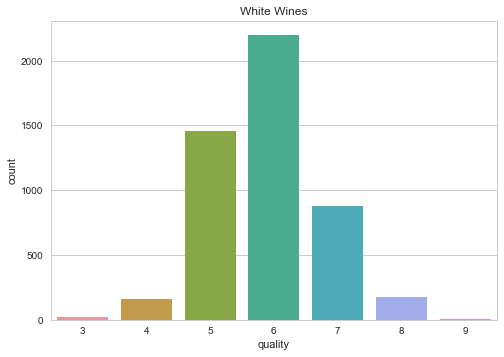

In [13]:
sns.countplot(data=white_wine_df, x="quality")
sns.plt.title("White Wines")

In [14]:
white_wine_df.quality.describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

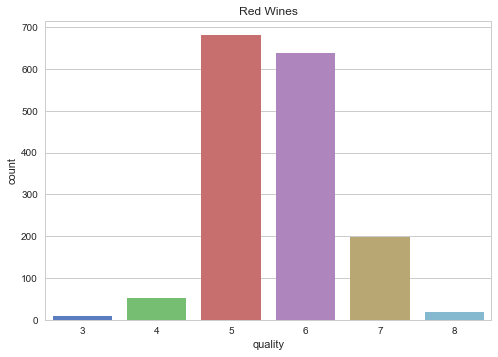

In [15]:
x = sns.countplot(data=red_wine_df, x="quality")
sns.plt.title("Red Wines")

In [16]:
red_wine_df.quality.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

# What may be important for a high quality rating?

__To find out, the percentual mean differences for low quality to high quality wines over the total mean are calculated, resulting in percentual changes.__

## For white wines:

In [17]:
x = white_wine_df.groupby(["quality"]).mean()
lower_quals = x.loc[:4].mean()
higher_quals = x.loc[7:].mean()
ww_perc_means = (higher_quals - lower_quals) / white_wine_df.mean() * 100
ww_perc_means

alcohol                 14.068993
chlorides              -38.372538
citric acid              7.758984
density                 -0.254610
fixed acidity           -6.235608
free sulfur dioxide    -10.177344
pH                       1.934262
quality                       NaN
residual sugar          -8.100321
sulphates                1.999155
total sulfur dioxide   -18.439304
volatile acidity       -27.979143
dtype: float64

### Comparing low quality means to high quality ones, the following attributes differ more than 5 per cent:

In [18]:
ww_perc_means[abs(ww_perc_means) > 5]

alcohol                 14.068993
chlorides              -38.372538
citric acid              7.758984
fixed acidity           -6.235608
free sulfur dioxide    -10.177344
residual sugar          -8.100321
total sulfur dioxide   -18.439304
volatile acidity       -27.979143
dtype: float64

### Comparing low quality means to high quality ones, the following attributes differ more than 10 per cent:

In [19]:
ww_perc_means[abs(ww_perc_means) > 10]

alcohol                 14.068993
chlorides              -38.372538
free sulfur dioxide    -10.177344
total sulfur dioxide   -18.439304
volatile acidity       -27.979143
dtype: float64

## For red wines:

In [20]:
x = red_wine_df.groupby(["quality"]).mean()
lower_quals = x.loc[:4].mean()
higher_quals = x.loc[7:].mean()
rw_perc_means = (higher_quals - lower_quals) / red_wine_df.mean() * 100
rw_perc_means

alcohol                 16.023546
chlorides              -38.955960
citric acid             77.707371
density                 -0.134937
fixed acidity            7.811538
free sulfur dioxide     12.783852
pH                      -3.345302
quality                       NaN
residual sugar          -0.609713
sulphates               26.028988
total sulfur dioxide     7.875629
volatile acidity       -71.161438
dtype: float64

### Comparing low quality means to high quality ones, the following attributes differ more than 5 per cent:

In [21]:
rw_perc_means[abs(rw_perc_means) > 5]

alcohol                 16.023546
chlorides              -38.955960
citric acid             77.707371
fixed acidity            7.811538
free sulfur dioxide     12.783852
sulphates               26.028988
total sulfur dioxide     7.875629
volatile acidity       -71.161438
dtype: float64

### Comparing low quality means to high quality ones, the following attributes differ more than 10 per cent:

In [22]:
rw_perc_means[abs(rw_perc_means) > 10]

alcohol                16.023546
chlorides             -38.955960
citric acid            77.707371
free sulfur dioxide    12.783852
sulphates              26.028988
volatile acidity      -71.161438
dtype: float64

# What will be taken a closer look at:

* Alcohol
* Chlorides
* Citric Acid
* Sulphates
* Sulfur Dioxides
* Volatile Acidity

# Sulfur Dioxides and Quality

### White Wines

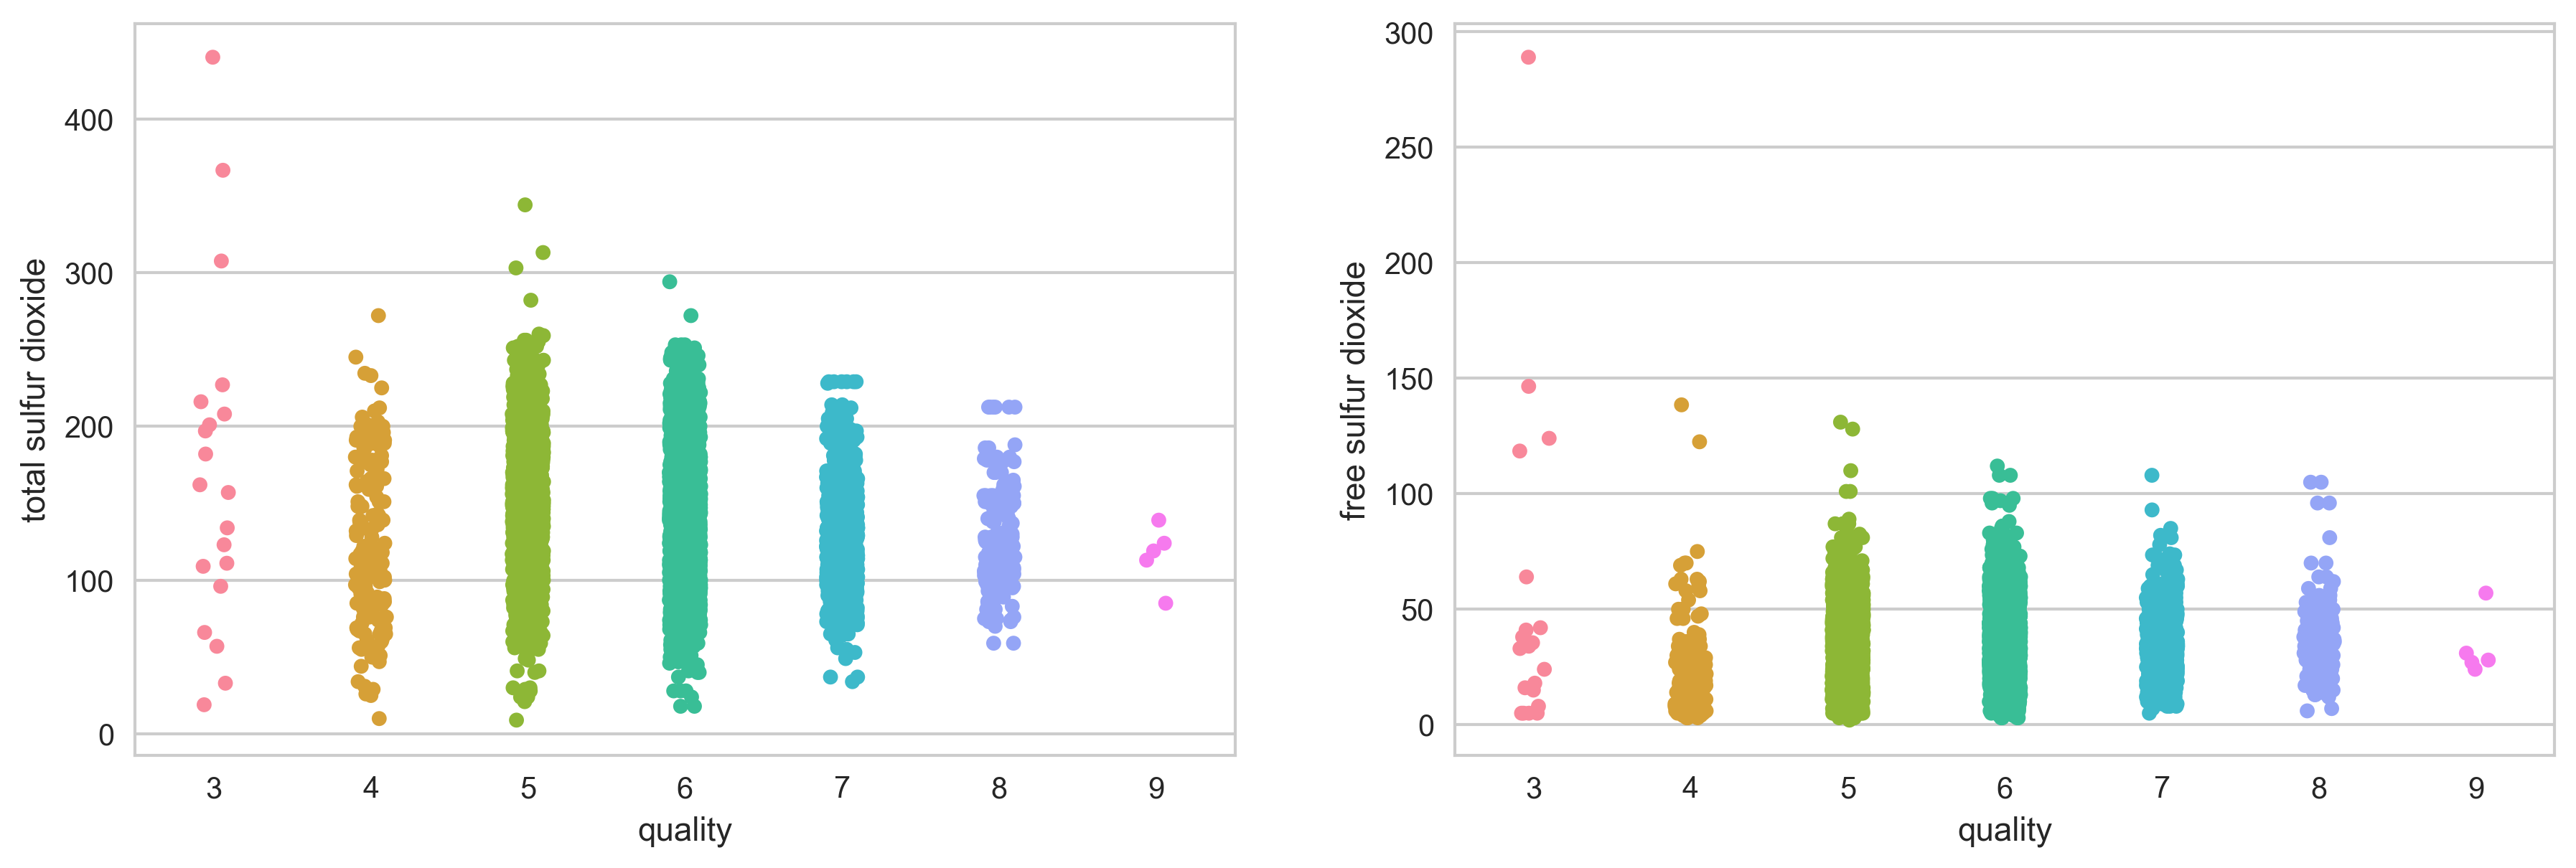

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(14.5, 4.5)
fig.dpi = 300
sns.stripplot(data=white_wine_df, x="quality", y="total sulfur dioxide", jitter=True, ax=ax1)
sns.stripplot(data=white_wine_df, x="quality", y="free sulfur dioxide", jitter=True, ax=ax2)

In [24]:
high_qual_ww_tsd_mean = white_wine_df[white_wine_df["quality"] >= 7]["total sulfur dioxide"].mean()
high_qual_ww_tsd_mean = format(high_qual_ww_tsd_mean, '.1f')
print(f"The mean for higher quality white wines (quality >= 7) is {high_qual_ww_tsd_mean}")

The mean for higher quality white wines (quality >= 7) is 125.2


### Interpretation White Wines

Both plots show, that higher quality white wines tend to have less total sulfur dioxide in it.

### red wine

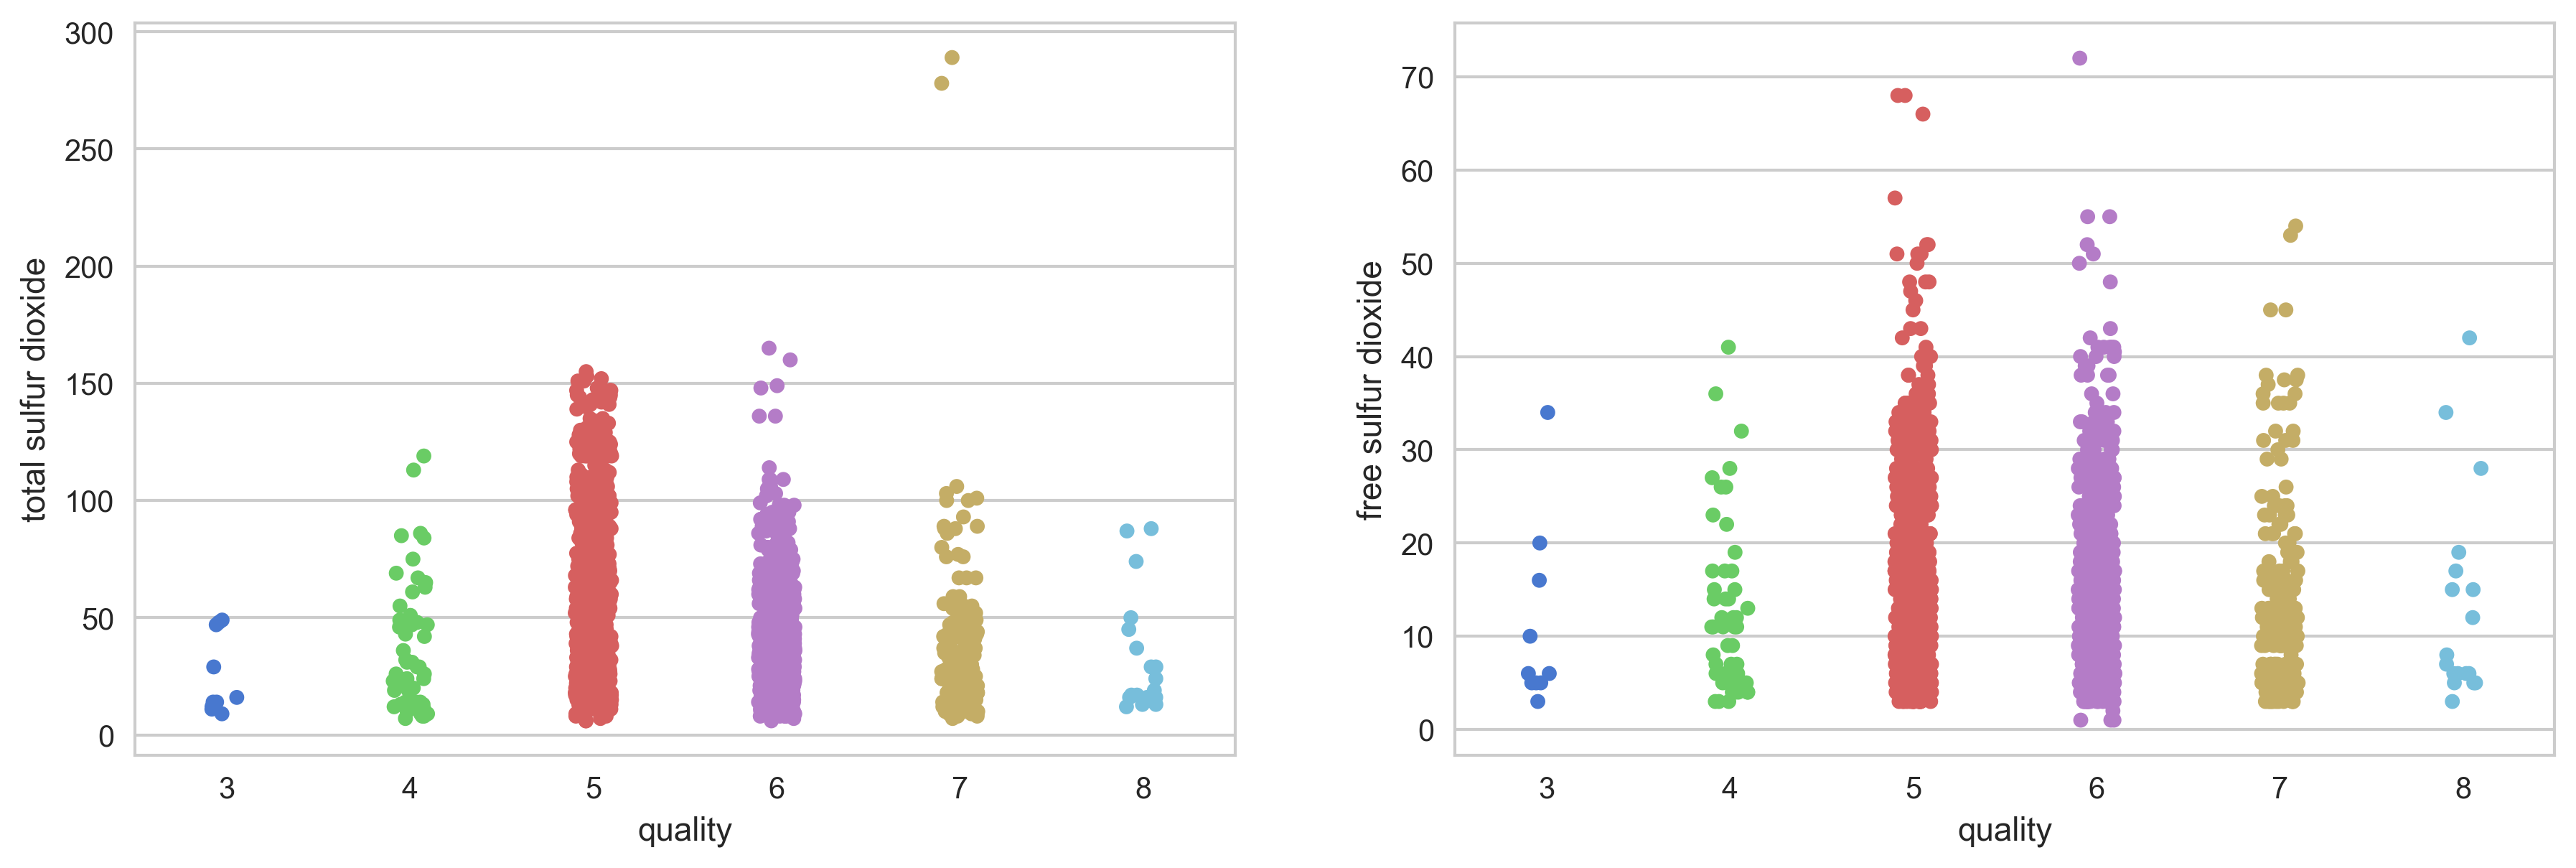

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(14.5, 4.5)
fig.dpi = 300
sns.stripplot(data=red_wine_df, x="quality", y="total sulfur dioxide", jitter=True, ax=ax1)
sns.stripplot(data=red_wine_df, x="quality", y="free sulfur dioxide", jitter=True, ax=ax2)

In [26]:
high_qual_rw_tsd_mean = red_wine_df[red_wine_df["quality"] >= 7]["total sulfur dioxide"].mean()
high_qual_rw_tsd_mean = format(high_qual_rw_tsd_mean, '.1f')
print(f"The mean for higher quality red wines (quality >= 7) is {high_qual_rw_tsd_mean}")

The mean for higher quality red wines (quality >= 7) is 34.9


## Interpretation Red Wines

For the red wines, there are much lower concentrations of sulfur dioxides. Additionally, there seems to be no direct correlation between sulfur dioxide concentration and percepted quality.

# Conclusion: Sulfur Dioxides and Quality

Regarding high quality white wines (>= 7), those wines have a mean of sulfur dioxides of around 125. Respectively high quality Red Wines (>=7) have a mean concentration of sulfur dioxide of 35.

# Sulphates and Quality

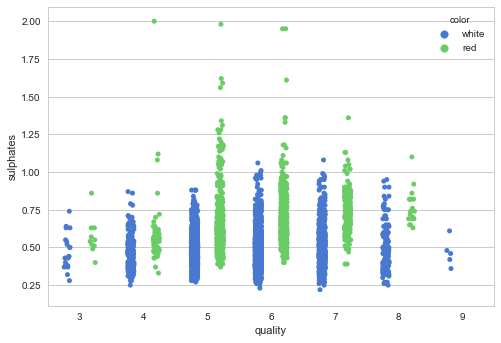

In [27]:
sns.stripplot(data=wine_df, x="quality", y="sulphates", jitter=True, hue="color", split=True)

## Alcohol in Wine

### White Wine

In [28]:
white_wine_df.groupby("quality")["alcohol"].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,20.0,10.345000,1.224089,8.0,9.55,10.45,11.00,12.6
4,163.0,10.152454,1.003217,8.4,9.40,10.10,10.75,13.5
5,1457.0,9.808840,0.847065,8.0,9.20,9.50,10.30,13.6
6,2198.0,10.575372,1.147776,8.5,9.60,10.50,11.40,14.0
7,880.0,11.367936,1.246536,8.6,10.60,11.40,12.30,14.2
8,175.0,11.636000,1.280138,8.5,11.00,12.00,12.60,14.0
9,5.0,12.180000,1.013410,10.4,12.40,12.50,12.70,12.9


### Red Wine

In [29]:
red_wine_df.groupby("quality")["alcohol"].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,9.955000,0.818009,8.4,9.725,9.925,10.575,11.0
4,53.0,10.265094,0.934776,9.0,9.600,10.000,11.000,13.1
5,681.0,9.899706,0.736521,8.5,9.400,9.700,10.200,14.9
6,638.0,10.629519,1.049639,8.4,9.800,10.500,11.300,14.0
7,199.0,11.465913,0.961933,9.2,10.800,11.500,12.100,14.0
8,18.0,12.094444,1.224011,9.8,11.325,12.150,12.875,14.0


### Plotting Alcohol to Quality

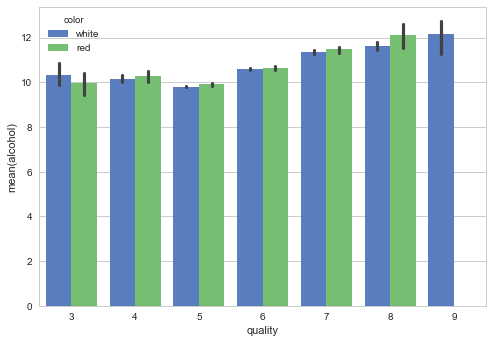

In [30]:
sns.barplot(data=wine_df, x="quality", y="alcohol", hue="color")

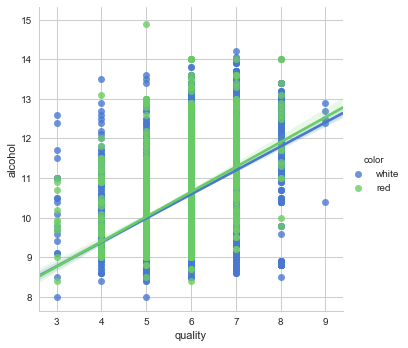

In [31]:
sns.lmplot(data=wine_df, x="quality", y="alcohol", hue="color")

#### Alcohol to Quality relation for Wines equal or greater than 7

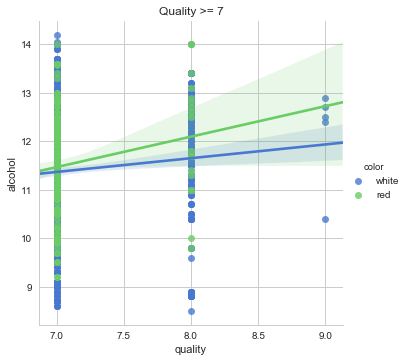

In [32]:
hq_wines = wine_df[wine_df.quality >= 7]
sns.lmplot(data=hq_wines, x="quality", y="alcohol", hue="color")
sns.plt.title("Quality >= 7")

## Heatmap Alcohol to Quality

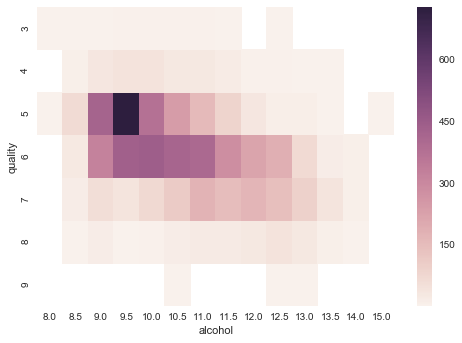

In [33]:
heat_table = wine_df[["quality", "alcohol"]].copy()
heat_table["alcohol"] = heat_table.alcohol.apply(func=lambda x: round(x * 2) / 2)
heat_table = heat_table.groupby(["quality", "alcohol"])["alcohol"].count().reset_index(name='counts')
sns.heatmap(heat_table.pivot("quality", "alcohol", "counts"))

# Chlorides

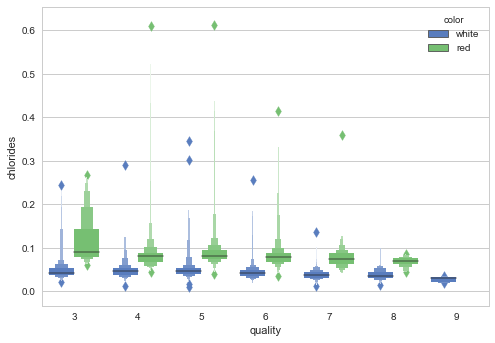

In [34]:
sns.lvplot(data=wine_df, hue="color", x="quality", y="chlorides")

__The less chlorides in a wine the higher the quality.__

## Chlorides and Alcohol

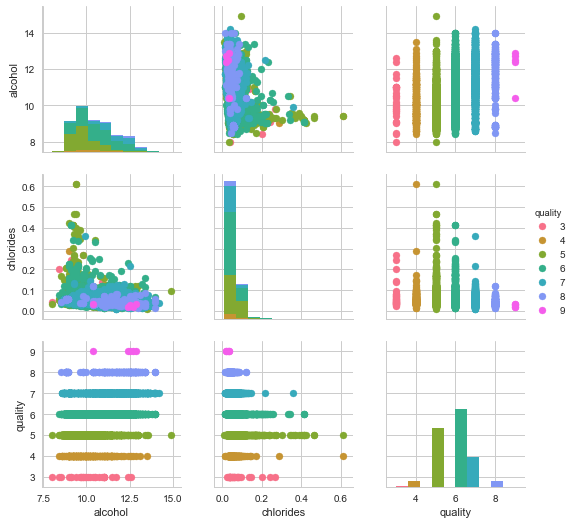

In [35]:
g = sns.PairGrid(wine_df[["alcohol", "chlorides", "quality"]], hue="quality")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

## Acids

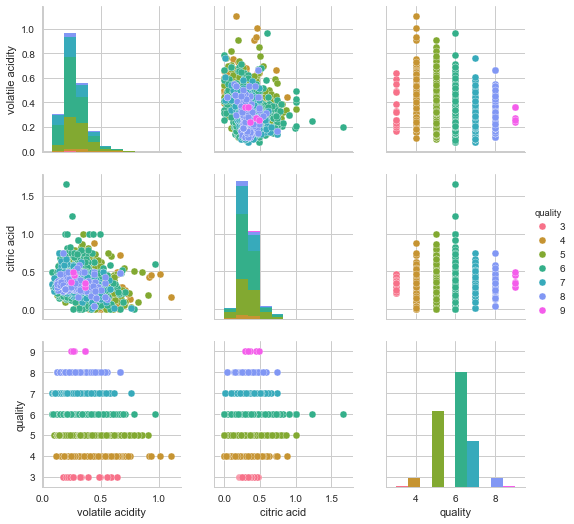

In [36]:
sns.pairplot(white_wine_df[["volatile acidity", "citric acid", "quality"]], hue="quality")

## Bringing the relevant attributes together

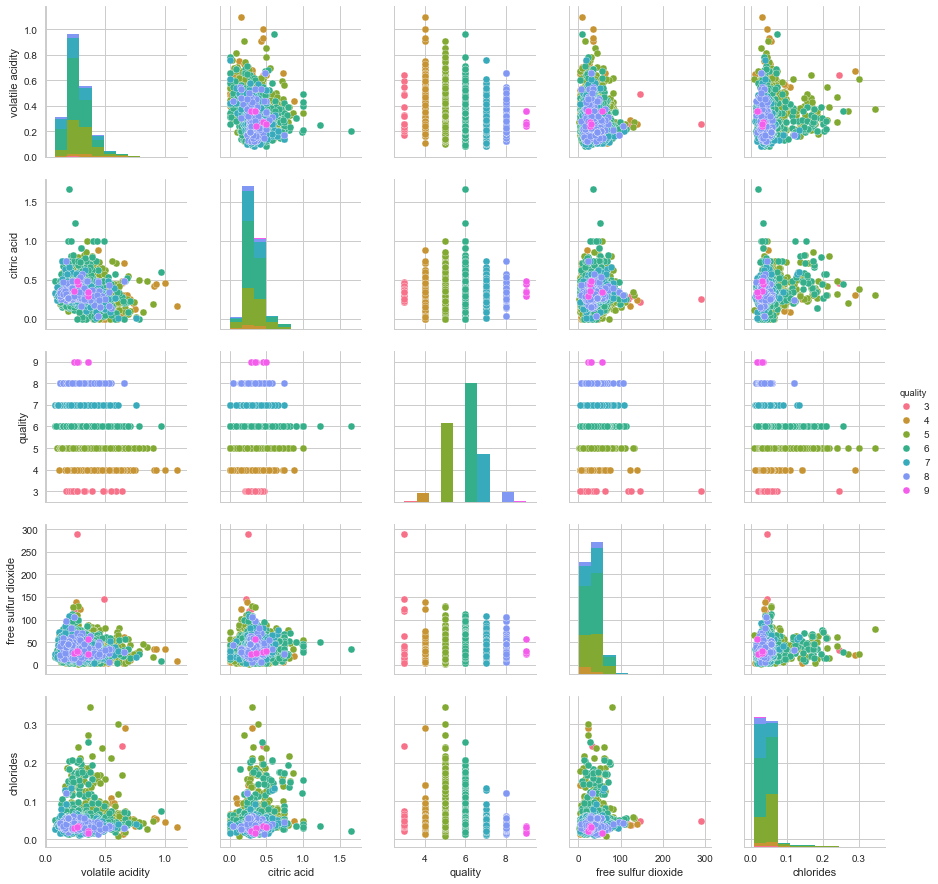

In [37]:
sns.pairplot(white_wine_df[["volatile acidity", "citric acid", "quality", "free sulfur dioxide", "chlorides"]], hue="quality")

In [38]:
white_wine_df[["volatile acidity", "citric acid", "quality"]].groupby("quality").describe(percentiles=[])

citric acid                                        volatile acidity  \
              count      mean       std   min    50%   max            count   
quality                                                                       
3              20.0  0.336000  0.081460  0.21  0.345  0.47             20.0   
4             163.0  0.304233  0.163857  0.00  0.290  0.88            163.0   
5            1457.0  0.337653  0.140814  0.00  0.320  1.00           1457.0   
6            2198.0  0.338025  0.119325  0.00  0.320  1.66           2198.0   
7             880.0  0.325625  0.079183  0.01  0.310  0.74            880.0   
8             175.0  0.326514  0.085439  0.04  0.320  0.74            175.0   
9               5.0  0.386000  0.082037  0.29  0.360  0.49              5.0   

                                                
             mean       std   min   50%    max  
quality                                         
3        0.333250  0.140827  0.17  0.26  0.640  
4        0.381227  0.173463  0.11  0.32  1.100  
5        0.302011  0.100066  0.10  0.28  0.905  
6        0.260564  0.088142  0.08  0.25  0.965  
7        0.262767  0.091106  0.08  0.25  0.760  
8        0.277400  0.108029  0.12  0.26  0.660  
9        0.298000  0.057619  0.24  0.27  0.360

In [39]:
white_wine_df[["quality", "free sulfur dioxide", "chlorides"]].groupby("quality").describe(percentiles=[])

chlorides                                           \
            count      mean       std    min    50%    max   
quality                                                      
3            20.0  0.054300  0.046468  0.022  0.041  0.244   
4           163.0  0.050098  0.025888  0.013  0.046  0.290   
5          1457.0  0.051546  0.026496  0.009  0.047  0.346   
6          2198.0  0.045217  0.020453  0.015  0.043  0.255   
7           880.0  0.038191  0.010697  0.012  0.037  0.135   
8           175.0  0.038314  0.013164  0.014  0.036  0.121   
9             5.0  0.027400  0.007436  0.018  0.031  0.035   

        free sulfur dioxide                                           
                      count       mean        std   min   50%    max  
quality                                                               
3                      20.0  53.325000  69.420776   5.0  33.5  289.0  
4                     163.0  23.358896  20.391349   3.0  18.0  138.5  
5                    1457.0  36.432052  18.145991   2.0  35.0  131.0  
6                    2198.0  35.650591  15.735679   3.0  34.0  112.0  
7                     880.0  34.125568  13.244737   5.0  33.0  108.0  
8                     175.0  36.720000  16.203675   6.0  35.0  105.0  
9                       5.0  33.400000  13.427584  24.0  28.0   57.0

# Final Conclusion

no attribute alone is strong enough to define a high quality wine, but as the figures show. For a wine to score high, having the acids and sulfur dioxide values all within in a certain range can help.

## Best vs. Worst

when comparing the best (8,9) vs. worst (3,4) we can see that they well overlap each other.

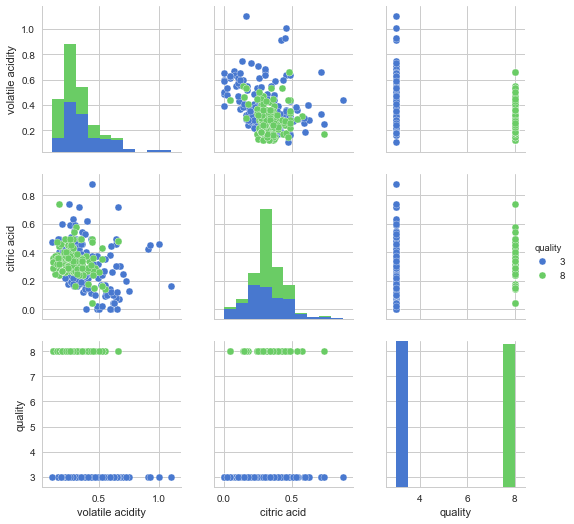

In [79]:
qual3 = white_wine_df[white_wine_df["quality"] == 3] 
qual4 = white_wine_df[white_wine_df["quality"] == 4].copy()
qual4.quality = 3
qual8 = white_wine_df[white_wine_df["quality"] == 8]
qual9 = white_wine_df[white_wine_df["quality"] == 9].copy()
qual9.quality = 8
white_wine_sample = pd.concat([qual3, qual4, qual8, qual9], ignore_index=True)
white_wine_sample
sns.pairplot(white_wine_sample[["volatile acidity", "citric acid", "quality"]], hue="quality")

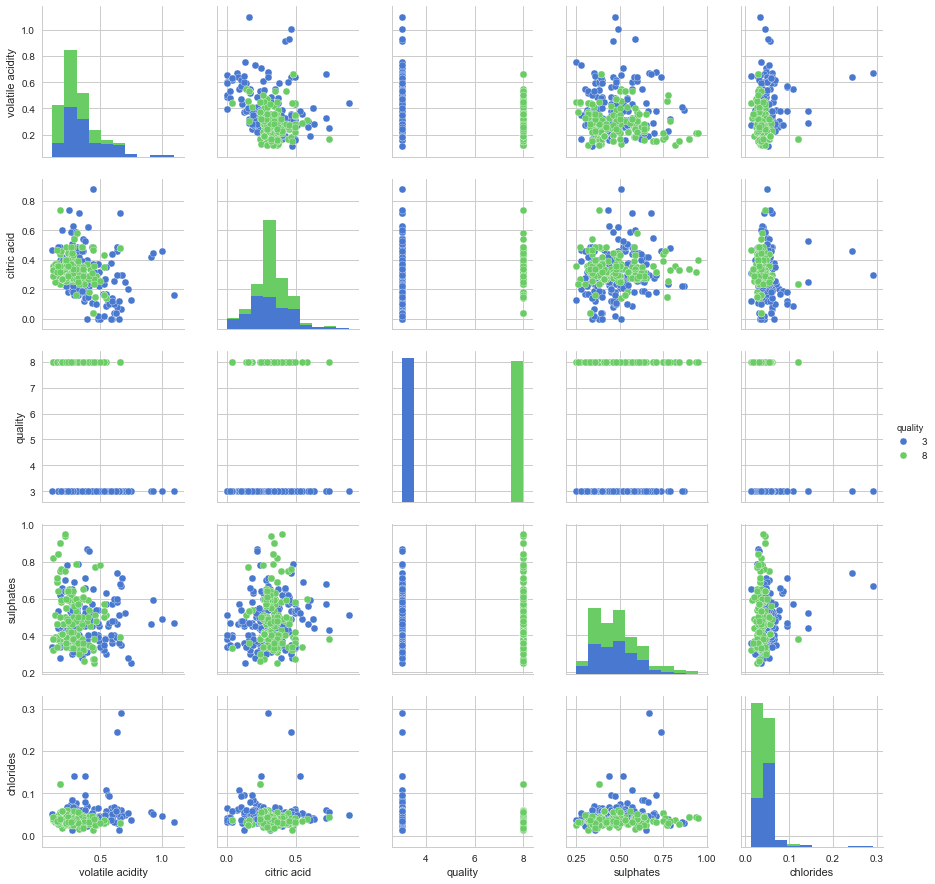

In [81]:
sns.pairplot(white_wine_sample[["volatile acidity", "citric acid", "quality", "sulphates", "chlorides"]], hue="quality")

# Seems like labs can't measure a wine's inner spirit, yet.

__But if you have to pick a wine only based on specs, i would suggest these white wines:__

In [87]:
qual8[["quality", "chlorides", "alcohol", "citric acid", "sulphates"]].describe(percentiles=[])

,quality,chlorides,alcohol,citric acid,sulphates
count,175.0,175.000000,175.000000,175.000000,175.000000
mean,8.0,0.038314,11.636000,0.326514,0.486229
std,0.0,0.013164,1.280138,0.085439,0.147073
min,8.0,0.014000,8.500000,0.040000,0.250000
50%,8.0,0.036000,12.000000,0.320000,0.460000
max,8.0,0.121000,14.000000,0.740000,0.950000


__and these red wines:__

In [89]:
rqual8 = red_wine_df[red_wine_df["quality"] == 8]
rqual9 = red_wine_df[red_wine_df["quality"] == 9].copy()
rqual9.quality = 8
red_wine_sample = pd.concat([rqual8, rqual9], ignore_index=True)
red_wine_sample[["quality", "chlorides", "alcohol", "citric acid", "sulphates"]].describe(percentiles=[])

,quality,chlorides,alcohol,citric acid,sulphates
count,18.0,18.000000,18.000000,18.000000,18.000000
mean,8.0,0.068444,12.094444,0.391111,0.767778
std,0.0,0.011678,1.224011,0.199526,0.115379
min,8.0,0.044000,9.800000,0.030000,0.630000
50%,8.0,0.070500,12.150000,0.420000,0.740000
max,8.0,0.086000,14.000000,0.720000,1.100000
